# 06과 단변량분석 종합실습과제

* 고객사는 카시트를 판매하는 회사 입니다.
* 최근 매출 하락에 대해 각 부서가 파악한 원인 다음과 같습니다. 
    * 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
    * 너무 국내 시장에 집중됨.
    * 지역마다의 구매력을 제대로 파악하지 못하고 있음.

* 그러나 이러한 분석은 데이터에 근거하고 있는지 의문이 듭니다.
* 이 문제를 해결하고자 프로젝트 팀이 빌딩되었습니다. 
* 여러분은 이 프로젝트팀에 데이터분석전문가 이자 AI 개발자로 참여하고 있습니다.
* 드디어 AIVLE 과정에서 배운 [파이썬 라이브러리 활용]과 [데이터 분석] 과정에서 갈고 닦은 실력을 발휘할 기회가 주어졌습니다.
* 자, 이제 단변량 분석을 통해 비즈니스 인사이트를 도출해 봅시다!


**단변량 분석 할 때 확인해야 할 점들**

* 개별 변수의 분포로 부터…
    * 값의 범위 확인
    * 데이터가 모여 있는 구간(혹은 범주)와 희박한 구간(혹은 범주) 확인
    * 이상치 확인 및 조치 방안
    * 결측치 확인 및 조치 방안
    * 가변수화, 스케일링 대상 선별

* 비즈니스의 일반 사항과 특이사항을 도출
    * 추가 분석 대상 도출.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 카시트 판매량 데이터

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	Income 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Urban 	|	 도심 지역 여부(0,1)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(0,1)	|	feature	|


In [3]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
data.drop('Education', axis = 1, inplace = True)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


### ① Sales (Target) 

In [11]:
var='Sales'

1) 변수의 비즈니스 의미

In [ ]:
각 지역 판매량

2) 숫자, 범주?

In [12]:
data[var].unique()

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  8.85, 13.39,  7.99,  9.46,  6.5 ,  5.52, 12.61,
        8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,  7.52, 11.62,  2.23,
        8.7 , 11.7 ,  6.56,  7.95,  5.33,  4.81,  4.53,  8.86,  8.39,
        5.58,  9.48,  7.45, 12.49,  4.88,  4.11,  5.3 ,  5.07,  4.62,
        5.55,  0.16,  3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,
        8.54,  8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,
        9.34, 11.27,  6.52,  4.96,  4.47,  8.41,  9.54,  7.62,  3.67,
        6.44,  5.17,

In [ ]:
숫자

3) NaN 존재 유무 및 조치방안

In [13]:
data[var].isna().sum()

0

4) 가변수화 필요 여부

In [ ]:
X

5) 기초통계량(수치화)

In [8]:
data[var].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

6) 분포 확인(시각화)

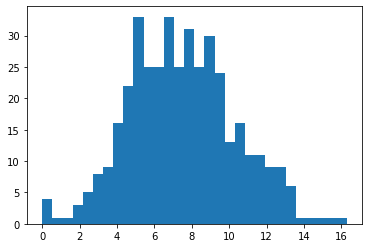

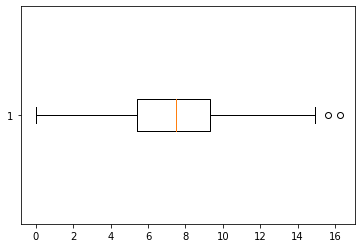

[5.39 0.  ]
[ 9.32 14.9 ]


In [20]:
plt.hist(data[var], bins=30)
plt.show()

box = plt.boxplot(data[var], vert=False)
plt.show()

print(box['whiskers'][0].get_xdata())
print(box['whiskers'][1].get_xdata())

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
판매액은 4000~10000달러 사이 수준에 밀집
0~4000 달러, 4000~10000달러, 10000~14000달러, 14000~ 달러 4개로 그룹을 나눌 수 있음

8) 추가 분석해 볼 사항이 있나요?

In [ ]:
4개 그룹별 지역으로 분류하여 위치가 비슷한 지역인지 확인하고 주거형태(다인가족, 1인가구 등)에 따라 다른지 확인 필요

### ② CompPrice

In [21]:
var='CompPrice'

1) 변수의 비즈니스 의미

In [ ]:
경쟁사 가격

2) 숫자, 범주?

In [22]:
data[var].unique()

array([138, 111, 113, 117, 141, 124, 115, 136, 132, 121, 122, 107, 149,
       118, 147, 110, 129, 125, 134, 128, 145, 139,  98, 103, 104, 114,
       131, 109, 130, 119, 157,  77, 123,  85, 127, 126, 116,  99, 153,
       143, 133,  93, 105, 100,  89, 148, 150,  88, 102, 151,  97, 161,
       135, 112,  94, 108,  96, 146, 140, 144, 142, 106, 137, 120, 156,
       155, 162,  86, 159,  95, 175, 154, 152], dtype=int64)

In [ ]:
숫자

3) NaN 존재 유무 및 조치방안

In [23]:
data[var].isna().sum()

0

4) 가변수화 필요 여부

In [ ]:
X

5) 기초통계량(수치화)

In [24]:
data[var].describe()

count    400.000000
mean     124.975000
std       15.334512
min       77.000000
25%      115.000000
50%      125.000000
75%      135.000000
max      175.000000
Name: CompPrice, dtype: float64

6) 분포 확인(시각화)

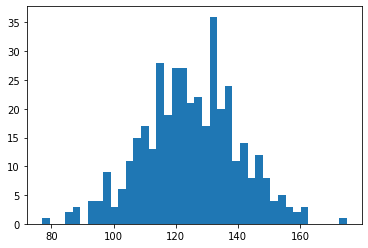

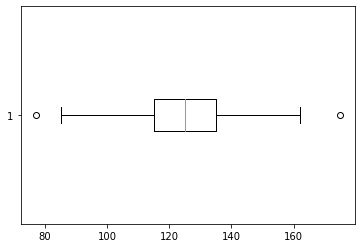

[115.  85.]
[135. 162.]


In [29]:
plt.hist(data[var], bins=40)
plt.show()

box = plt.boxplot(data[var], vert=False)
plt.show()

print(box['whiskers'][0].get_xdata())
print(box['whiskers'][1].get_xdata())

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
경쟁사는 평균적으로로 110~135정도의 가격으로 판매중
0~100 구간, 100에서 115구간, 115~130구간 130~140구간, 140~160 구간 총 5구간으로 분류 가능
각 구간 제품 품질, 특성등 확인하여 구간 분류 필요요망

8) 추가 분석해 볼 사항이 있나요?

### ③ Income

In [30]:
var='Income'

1) 변수의 비즈니스 의미

In [ ]:
지역평균소득

2) 숫자, 범주?

In [31]:
data[var].unique()

array([ 73,  48,  35, 100,  64, 113, 105,  81, 110,  78,  94,  28, 117,
        95,  32,  74,  76,  90,  29,  46,  31, 119, 115, 118,  99,  58,
        38,  54,  84,  41,  60,  98,  53,  69,  42,  79,  63,  52,  93,
        40, 103,  82,  91,  71, 102,  45,  88,  67,  26,  92,  61,  59,
        51,  68, 111,  87,  72,  83,  36,  25,  66,  22,  30,  97,  77,
        47,  96,  33, 107,  65,  62,  75,  89, 120,  34,  21,  39, 106,
        24, 112,  37,  70,  80,  44, 104,  43,  56, 114,  57,  86,  50,
        27, 101, 109,  55, 116, 108,  23], dtype=int64)

In [ ]:
숫자

3) NaN 존재 유무 및 조치방안

In [32]:
data[var].isna().sum()

0

4) 가변수화 필요 여부

In [ ]:
X

5) 기초통계량(수치화)

In [33]:
data[var].describe()

count    400.000000
mean      68.657500
std       27.986037
min       21.000000
25%       42.750000
50%       69.000000
75%       91.000000
max      120.000000
Name: Income, dtype: float64

6) 분포 확인(시각화)

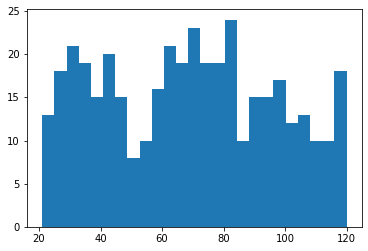

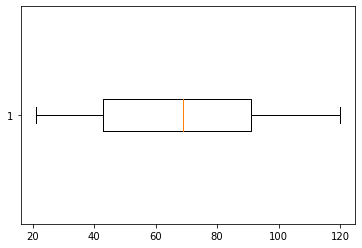

[42.75 21.  ]
[ 91. 120.]


In [38]:
plt.hist(data[var], bins = 25)
plt.show()

box= plt.boxplot(data[var], vert=False)
plt.show()

print(box['whiskers'][0].get_xdata())
print(box['whiskers'][1].get_xdata())

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
평균은 70정도이나 크게 3분류로 나누어 볼 수 있음
20~50, 50~85,85~110 구간 3분류로 나누어 볼 수 있음
각 구간별 분석하여 지역, 구매한 사람의 가족형태 등 특성을 파악할 필요가 있음

8) 추가 분석해 볼 사항이 있나요?

### ④ Advertising

In [44]:
var='Advertising'

1) 변수의 비즈니스 의미

In [ ]:
각지역,회사단위 광고예산

2) 숫자, 범주?

In [45]:
data[var].unique()

array([11, 16, 10,  4,  3, 13,  0, 15,  9,  2,  5, 12,  6, 14, 18, 19, 20,
       23,  1,  7, 24,  8, 17, 25, 26, 29, 22, 21], dtype=int64)

In [ ]:
숫자

3) NaN 존재 유무 및 조치방안

In [46]:
data[var].isna().sum()

0

4) 가변수화 필요 여부

In [ ]:
X

5) 기초통계량(수치화)

In [47]:
data[var].describe()

count    400.000000
mean       6.635000
std        6.650364
min        0.000000
25%        0.000000
50%        5.000000
75%       12.000000
max       29.000000
Name: Advertising, dtype: float64

6) 분포 확인(시각화)

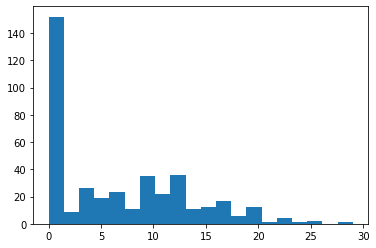

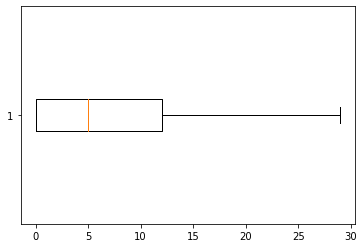

[0. 0.]
[12. 29.]


In [54]:
plt.hist(data[var], bins=20)
plt.show()

box = plt.boxplot(data[var], vert=False)
plt.show()

print(box['whiskers'][0].get_xdata())
print(box['whiskers'][1].get_xdata())

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
0~1500달러 사이의 값들이 많고 3000~6500, 9000~13500 사이에 값들이모여있음
위 세구간에 135000~17000 구간을 추가 하여 4구간을 분류 가능
첫 구간에 데이터가 많으므로 첫 구간의 특성(매출액, 구매량 증감여부 등)
4구간 분석하여 광고비용이 많을 수록 매출과 어떤연관이 있는지 확인 필요

8) 추가 분석해 볼 사항이 있나요?

### ⑤ Population

In [60]:
var='Population'

1) 변수의 비즈니스 의미

In [ ]:
지역 인구수

2) 숫자, 범주?

In [61]:
data[var].unique()

array([276, 260, 269, 466, 340, 501,  45, 425, 108, 131, 150, 503, 393,
        29, 148, 400, 284, 251, 408,  58, 367, 239, 497, 292, 294, 176,
       496,  19, 359, 226, 447, 241, 236, 317, 406, 270, 412, 454, 144,
        18, 403,  25,  16, 325, 168, 173, 349,  51, 341, 112,  39,  60,
        54,  22, 188, 469, 358, 146, 170, 184, 197, 508, 152, 366, 339,
       237, 432, 125, 480, 346,  44, 139, 286, 353, 468,  52, 304, 272,
       493, 491, 267,  97,  67, 134, 407, 287, 382, 220,  94,  89,  57,
       334, 472, 398, 217, 104, 488, 298, 335,  17,  95, 202, 507, 243,
       137, 249, 380, 181, 192, 350, 279, 208, 232, 265, 327, 384,  10,
       436, 371, 310, 277, 331, 300,  36, 264,  27, 402, 140, 289,  59,
       189, 372, 486,  81, 424,  40, 100, 151, 216, 492, 356, 416, 123,
       207,  38,  70, 434,  79, 230, 426,  35, 449,  93, 142, 509, 297,
        71, 481, 420, 410, 333, 500, 413, 132, 326, 357, 445,  48, 156,
       262, 178, 464, 245,  68, 381, 404, 119,  24, 218, 361, 49

In [ ]:
숫자

3) NaN 존재 유무 및 조치방안

In [62]:
data[var].isna().sum()

0

4) 가변수화 필요 여부

In [ ]:
X

5) 기초통계량(수치화)

In [63]:
data[var].describe()

count    400.000000
mean     264.840000
std      147.376436
min       10.000000
25%      139.000000
50%      272.000000
75%      398.500000
max      509.000000
Name: Population, dtype: float64

6) 분포 확인(시각화)

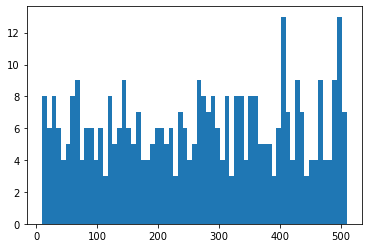

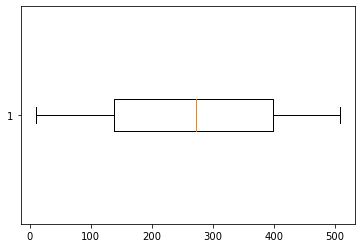

In [69]:
plt.hist(data[var], bins=65)
plt.show()

box = plt.boxplot(data[var], vert=False)
plt.show()


7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
평균은 270정도이나 값들이 고루 분포 되어있음
크게 4구간으로 나누어 분석필요(0~100, 100~230,230~390,390~500)
각 구간별 판매량, 가족형태, 지역에 따라 주거구역인지 아닌지 등 분석 필요

8) 추가 분석해 볼 사항이 있나요?

### ⑥ Price

In [71]:
var='Price'

1) 변수의 비즈니스 의미

In [ ]:
자사제품 지역별 판매가격

2) 숫자, 범주?

In [72]:
data[var].unique()

array([120,  83,  80,  97, 128,  72, 108, 124, 100,  94, 136,  86, 118,
       144, 110, 131,  68, 121, 109, 138, 113,  82, 107, 102,  89, 137,
        96, 126,  24, 134,  95, 135,  70,  98, 149, 129, 119, 154,  84,
       117, 103, 114, 123, 133, 101, 104,  91, 115,  99, 150, 116,  92,
       145,  90,  79, 139, 112, 111, 125, 148, 132, 127, 106, 151,  87,
       155,  49, 147,  77, 159,  69, 157, 160, 141, 191,  93,  55, 185,
       122,  81, 140, 173, 146, 130,  64, 105, 163,  88, 156, 166,  63,
       158,  74,  54, 171, 152, 143, 164, 162,  53,  78], dtype=int64)

In [ ]:
숫자

3) NaN 존재 유무 및 조치방안

In [74]:
data[var].isna().sum()

0

4) 가변수화 필요 여부

In [ ]:
X

5) 기초통계량(수치화)

In [75]:
data[var].describe()

count    400.000000
mean     115.795000
std       23.676664
min       24.000000
25%      100.000000
50%      117.000000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

6) 분포 확인(시각화)

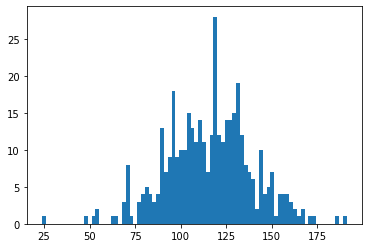

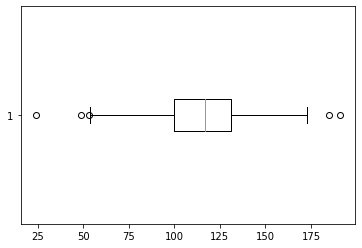

In [79]:
plt.hist(data[var], bins=80)
plt.show()

plt.boxplot(data[var], vert=False)
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
크게 3구간으로분류 가능(25~70,70~120,120~175)
각 구간별 판매량 분석 필요
판매가격이 다른 요인이 무엇인지 분석 필요(광고예산, 경쟁사 등)

8) 추가 분석해 볼 사항이 있나요?

### ⑦ ShelveLoc

In [4]:
var='ShelveLoc'

1) 변수의 비즈니스 의미

In [ ]:
진열상태

2) 숫자, 범주?

In [81]:
data[var].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [ ]:
범주

3) NaN 존재 유무 및 조치방안

In [82]:
data[var].isna().sum()

0

4) 가변수화 필요 여부

In [83]:
data[var] = data[var].map({'Bad':0,'Good':2,'Medium':1})

5) 기초통계량(수치화)

In [108]:
print(data[var].value_counts())
print(data[var].value_counts()/data[var].value_counts().sum())

1    219
0     96
2     85
Name: ShelveLoc, dtype: int64
1    0.5475
0    0.2400
2    0.2125
Name: ShelveLoc, dtype: float64


6) 분포 확인(시각화)

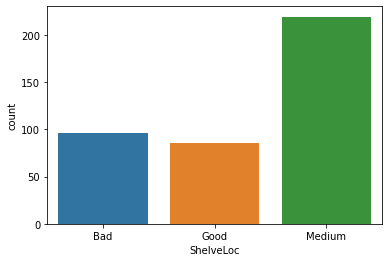

In [5]:
sns.countplot(data[var])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
대체로 보통의 진열상태
각 진열상태에 따라 판매량, 충성구매자 수 등 분석 필요
진열상태 0에서 2로 변화시 판매량, 구매자 수 변화 있는지 확인 필요

8) 추가 분석해 볼 사항이 있나요?

### ⑧ Age

In [6]:
var='Age'

1) 변수의 비즈니스 의미

In [ ]:
지역인구의 평균 나이

2) 숫자, 범주?

In [87]:
data[var].unique()

array([42, 65, 59, 55, 38, 78, 71, 67, 76, 26, 50, 62, 53, 52, 63, 46, 69,
       35, 79, 54, 64, 58, 30, 44, 60, 73, 48, 32, 80, 75, 39, 61, 74, 29,
       77, 56, 47, 25, 31, 36, 41, 68, 70, 28, 43, 49, 45, 33, 34, 51, 40,
       72, 57, 27, 66, 37], dtype=int64)

In [ ]:
숫자

3) NaN 존재 유무 및 조치방안

In [89]:
data[var].isna().sum()

0

4) 가변수화 필요 여부

In [90]:
X

NameError: name 'X' is not defined

5) 기초통계량(수치화)

In [91]:
data[var].describe()

count    400.000000
mean      53.322500
std       16.200297
min       25.000000
25%       39.750000
50%       54.500000
75%       66.000000
max       80.000000
Name: Age, dtype: float64

6) 분포 확인(시각화)

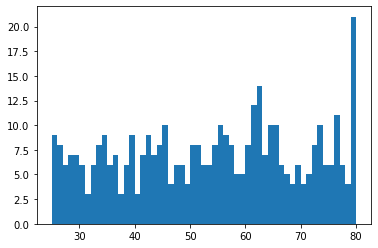

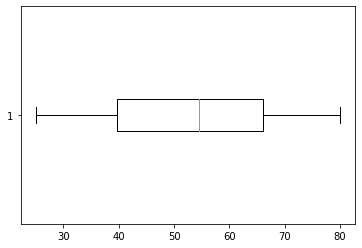

In [97]:
plt.hist(data[var],bins=55)
plt.show()

plt.boxplot(data[var],vert=False)
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
값이 고루 분포해있으나 장년층이 더 많음
데이터와 달리 20~30세 30~60세 60~80세 구간으로 나누어 분석필요
30~60, 60~80의 경우 결혼여부, 배우자 유무 등 확인 필요

8) 추가 분석해 볼 사항이 있나요?

### ⑨ Urban

In [7]:
var='Urban'

1) 변수의 비즈니스 의미

In [ ]:
도심 지역 여부

2) 숫자, 범주?

In [100]:
data[var].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
범주

3) NaN 존재 유무 및 조치방안

In [101]:
data[var].isna().sum()

0

4) 가변수화 필요 여부

In [102]:
data[var] = data[var].map({'Yes':1,'No':0})

5) 기초통계량(수치화)

In [110]:
print(data[var].value_counts())
print(data[var].value_counts()/data[var].value_counts().sum())

1    282
0    118
Name: Urban, dtype: int64
1    0.705
0    0.295
Name: Urban, dtype: float64


6) 분포 확인(시각화)

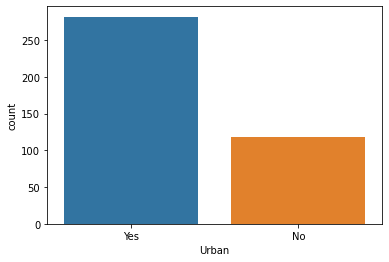

In [8]:
sns.countplot(data[var])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
도심지역이 대다수
각 지역별 판매량, 가구형태 등과 연관하여 분석 필요

8) 추가 분석해 볼 사항이 있나요?

### ⑩ US

In [9]:
var='US'

1) 변수의 비즈니스 의미

In [ ]:
매장이 미국에 위치하는지

2) 숫자, 범주?

In [113]:
data[var].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
범주

3) NaN 존재 유무 및 조치방안

In [114]:
data[var].isna().sum()

0

4) 가변수화 필요 여부

In [115]:
data[var] = data[var].map({'Yes':1, 'No':0})

5) 기초통계량(수치화)

In [116]:
print(data[var].value_counts())
print(data[var].value_counts()/data[var].value_counts().sum())

1    258
0    142
Name: US, dtype: int64
1    0.645
0    0.355
Name: US, dtype: float64


6) 분포 확인(시각화)

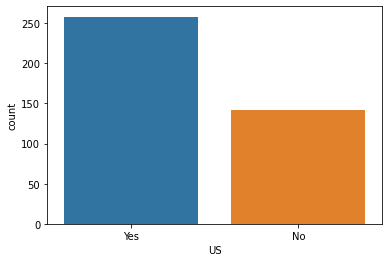

In [10]:
sns.countplot(data[var])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
매장이 미국에 있는지 아닌지에 따른 판매량 확인
미국내에 있는 매장 중에서도 지역구분(주거, 산업등)에 따라 어떤지 확인필요

8) 추가 분석해 볼 사항이 있나요?